In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
def create_dataset(directory):
    data = []
    
    # Traverse the directory
    for subdir, _, files in os.walk(directory):
        for file in files:
            # Check if the file is an image
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                # Get the label from the subfolder name
                label = os.path.basename(subdir)
                # Get the full path of the image
                file_path = os.path.join(subdir, file)
                # Append to the dataset
                data.append((file_path, label))
    
    # Create a DataFrame from the dataset
    df = pd.DataFrame(data, columns=['image_path', 'label'])
    return df

In [3]:
directory = 'C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\train'
directory_val = 'C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\validation'
dataset = create_dataset(directory)
val_dataset = create_dataset(directory_val)

In [4]:
dataset.head()

,image_path,label
0,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry
1,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry
2,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry
3,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry
4,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry


In [5]:
val_dataset.head()

,image_path,label
0,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry
1,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry
2,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry
3,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry
4,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry


In [6]:
dataset.shape

(28821, 2)

In [7]:
val_dataset.shape

(7066, 2)

In [8]:
filepaths = []
for label in dataset.image_path:
    filepaths.append(label)

filepaths[:5]

['C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\train\\angry\\0.jpg',
 'C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\train\\angry\\1.jpg',
 'C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\train\\angry\\10.jpg',
 'C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\train\\angry\\10002.jpg',
 'C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\train\\angry\\10016.jpg']

In [9]:
filepaths_val = []
for label_v in val_dataset.image_path:
    filepaths_val.append(label_v)

filepaths_val[:5]

['C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\validation\\angry\\10052.jpg',
 'C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\validation\\angry\\10065.jpg',
 'C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\validation\\angry\\10079.jpg',
 'C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\validation\\angry\\10095.jpg',
 'C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\validation\\angry\\10121.jpg']

In [10]:
def append_images():
    images = []
    val_images = []
    for filepath in filepaths:
        image = cv2.imread(filepath)
        images.append(image)

    for filepath_2 in filepaths_val:
        image_2 = cv2.imread(filepath_2)
        val_images.append(image_2)

    return images, val_images

In [11]:
images = []
val_images = []
images, val_images = append_images()
images[:1]

[array([[[ 72,  72,  72],
         [ 78,  78,  78],
         [ 81,  81,  81],
         ...,
         [ 52,  52,  52],
         [ 43,  43,  43],
         [ 40,  40,  40]],
 
        [[ 65,  65,  65],
         [ 62,  62,  62],
         [ 59,  59,  59],
         ...,
         [ 55,  55,  55],
         [ 52,  52,  52],
         [ 45,  45,  45]],
 
        [[ 47,  47,  47],
         [ 42,  42,  42],
         [ 60,  60,  60],
         ...,
         [ 47,  47,  47],
         [ 54,  54,  54],
         [ 49,  49,  49]],
 
        ...,
 
        [[ 91,  91,  91],
         [ 65,  65,  65],
         [ 46,  46,  46],
         ...,
         [ 74,  74,  74],
         [ 54,  54,  54],
         [ 43,  43,  43]],
 
        [[ 76,  76,  76],
         [ 80,  80,  80],
         [ 76,  76,  76],
         ...,
         [108, 108, 108],
         [ 69,  69,  69],
         [ 46,  46,  46]],
 
        [[ 77,  77,  77],
         [ 74,  74,  74],
         [ 81,  81,  81],
         ...,
         [105, 105, 105],
  

In [12]:
val_images[:1]

[array([[[58, 58, 58],
         [66, 66, 66],
         [70, 70, 70],
         ...,
         [51, 51, 51],
         [47, 47, 47],
         [35, 35, 35]],
 
        [[62, 62, 62],
         [64, 64, 64],
         [73, 73, 73],
         ...,
         [59, 59, 59],
         [51, 51, 51],
         [42, 42, 42]],
 
        [[66, 66, 66],
         [69, 69, 69],
         [87, 87, 87],
         ...,
         [58, 58, 58],
         [54, 54, 54],
         [53, 53, 53]],
 
        ...,
 
        [[ 8,  8,  8],
         [15, 15, 15],
         [19, 19, 19],
         ...,
         [ 5,  5,  5],
         [ 7,  7,  7],
         [ 8,  8,  8]],
 
        [[ 6,  6,  6],
         [14, 14, 14],
         [17, 17, 17],
         ...,
         [ 4,  4,  4],
         [ 7,  7,  7],
         [10, 10, 10]],
 
        [[ 8,  8,  8],
         [15, 15, 15],
         [20, 20, 20],
         ...,
         [ 5,  5,  5],
         [ 7,  7,  7],
         [ 9,  9,  9]]], dtype=uint8)]

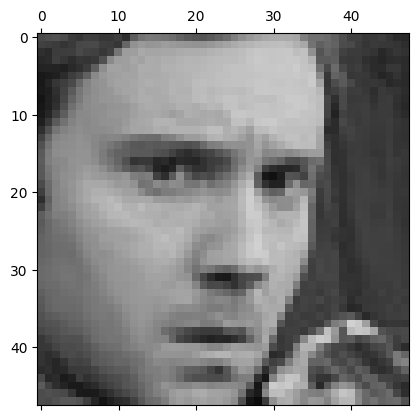

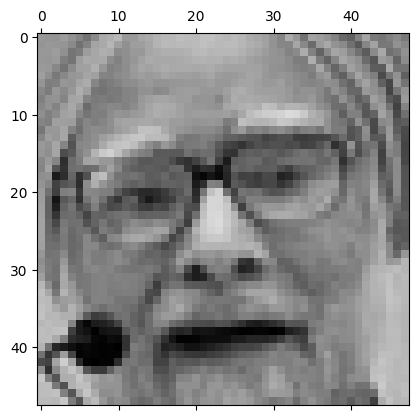

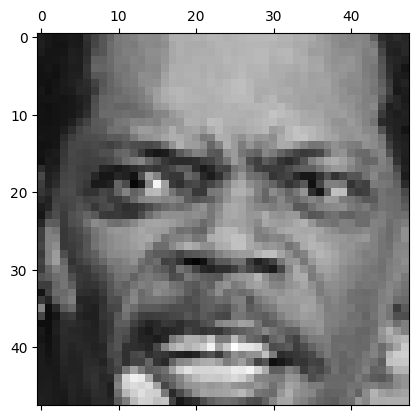

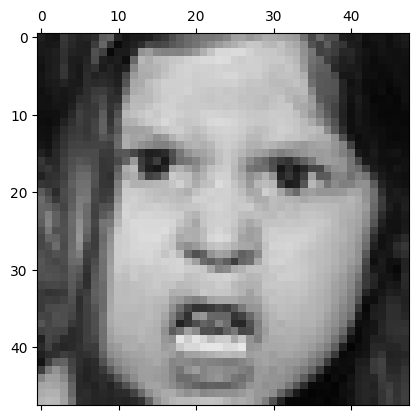

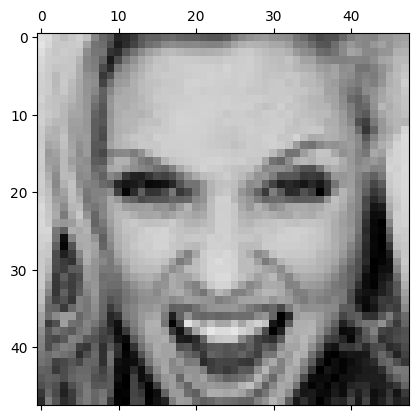

In [13]:
for img in images[:5]:
    plt.matshow(img)

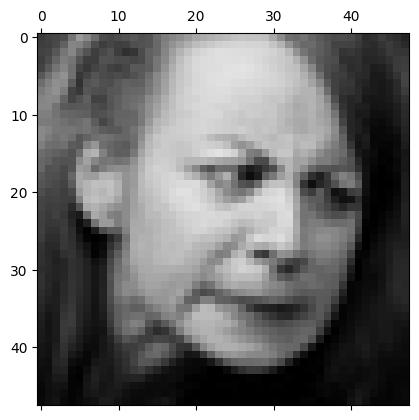

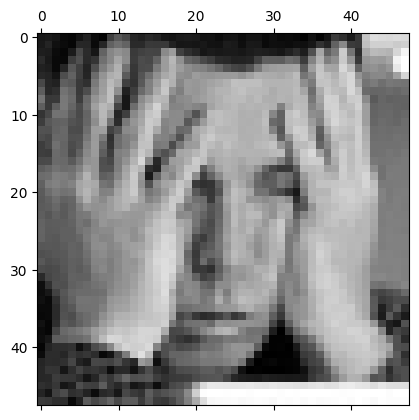

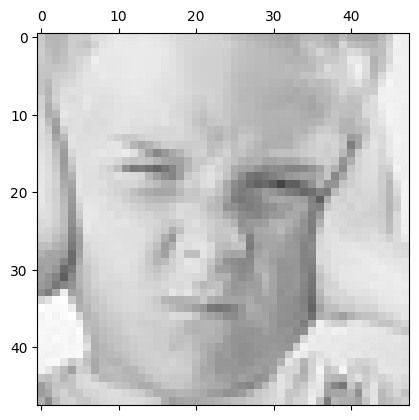

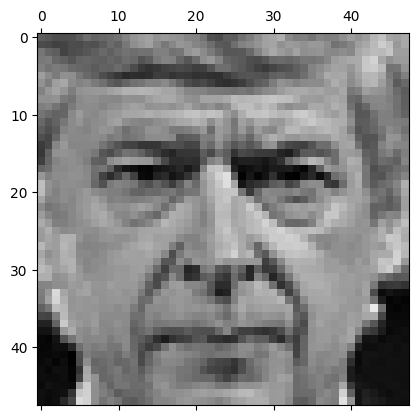

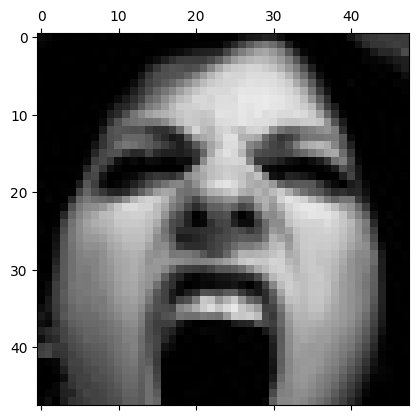

In [14]:
for imgs in val_images[:5]:
    plt.matshow(imgs)

In [15]:
images = np.array(images)
val_images = np.array(val_images)

In [16]:
dataset['images_n'] = list(images)
val_dataset['images_n'] = list(val_images)

In [17]:
dataset.head()

,image_path,label,images_n
0,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry,"[[[72, 72, 72], [78, 78, 78], [81, 81, 81], [7..."
1,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry,"[[[152, 152, 152], [149, 149, 149], [147, 147,..."
2,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry,"[[[29, 29, 29], [25, 25, 25], [21, 21, 21], [2..."
3,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry,"[[[32, 32, 32], [23, 23, 23], [20, 20, 20], [5..."
4,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry,"[[[222, 222, 222], [218, 218, 218], [202, 202,..."


In [18]:
val_dataset.head()

,image_path,label,images_n
0,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry,"[[[58, 58, 58], [66, 66, 66], [70, 70, 70], [7..."
1,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry,"[[[23, 23, 23], [26, 26, 26], [21, 21, 21], [9..."
2,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry,"[[[201, 201, 201], [182, 182, 182], [182, 182,..."
3,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry,"[[[93, 93, 93], [86, 86, 86], [78, 78, 78], [7..."
4,C:\Users\gotze\OneDrive\Desktop\ESD Mf\images\...,angry,"[[[11, 11, 11], [6, 6, 6], [1, 1, 1], [0, 0, 0..."


In [19]:
dataset = dataset.drop('image_path', axis='columns')
val_dataset = val_dataset.drop('image_path', axis='columns')
dataset.head(3)

,label,images_n
0,angry,"[[[72, 72, 72], [78, 78, 78], [81, 81, 81], [7..."
1,angry,"[[[152, 152, 152], [149, 149, 149], [147, 147,..."
2,angry,"[[[29, 29, 29], [25, 25, 25], [21, 21, 21], [2..."


In [20]:
val_dataset.head(3)

,label,images_n
0,angry,"[[[58, 58, 58], [66, 66, 66], [70, 70, 70], [7..."
1,angry,"[[[23, 23, 23], [26, 26, 26], [21, 21, 21], [9..."
2,angry,"[[[201, 201, 201], [182, 182, 182], [182, 182,..."


In [21]:
dataset['images_n'] = dataset['images_n']/255
val_dataset['images_n'] = val_dataset['images_n']/255

In [22]:
dataset.head(3)

,label,images_n
0,angry,"[[[0.2823529411764706, 0.2823529411764706, 0.2..."
1,angry,"[[[0.596078431372549, 0.596078431372549, 0.596..."
2,angry,"[[[0.11372549019607843, 0.11372549019607843, 0..."


# Creating a Neural Network

In [23]:
X_train = np.stack(dataset['images_n'].values)
y_train = dataset['label'].values

In [24]:
X_val = np.stack(val_dataset['images_n'].values)
y_val = val_dataset['label'].values

In [25]:
label_mapping = {label: idx for idx, label in enumerate(np.unique(y_train))}
y_train = np.array([label_mapping[label] for label in y_train])
y_val = np.array([label_mapping[label] for label in y_val])

In [26]:
emotions = np.array(dataset.label.unique())
emotions

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [27]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=7)
y_val = to_categorical(y_val, num_classes=7)

In [28]:
y_train[18888:18900]

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

In [29]:
img_height, img_width = 48, 48
batch_size = 64  # An appropriate batch size for your dataset
num_classes = 7  # Number of classes in the output layer

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [31]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [59]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the base model
base_model.trainable = False

C:\Users\gotze\AppData\Local\Temp\ipykernel_19404\1192342740.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))


In [32]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [65]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Add dropout layer
x = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)  # Add L2 regularization
predictions = Dense(num_classes, activation='softmax')(x) 

In [66]:
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [69]:
model.save('C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\Model1.keras')

In [34]:
from tensorflow.keras.models import load_model

In [50]:
model = load_model('C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\Model2.keras')

In [51]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=30,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 168s 370ms/step - accuracy: 0.6905 - loss: 0.8440 - val_accuracy: 0.6480 - val_loss: 1.0038
Epoch 2/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 169s 374ms/step - accuracy: 0.6979 - loss: 0.8346 - val_accuracy: 0.6469 - val_loss: 1.0073
Epoch 3/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 170s 376ms/step - accuracy: 0.6950 - loss: 0.8391 - val_accuracy: 0.6404 - val_loss: 1.0117
Epoch 4/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 168s 372ms/step - accuracy: 0.6969 - loss: 0.8383 - val_accuracy: 0.6394 - val_loss: 1.0326
Epoch 5/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 170s 376ms/step - accuracy: 0.6953 - loss: 0.8403 - val_accuracy: 0.6172 - val_loss: 1.1923
Epoch 6/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 162s 359ms/step - accuracy: 0.6961 - loss: 0.8343 - val_accuracy: 0.6186 - val_loss: 1.0995
Epoch 7/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 163s 361ms/step - accuracy: 0.7019 - loss: 0.8257 - val_accuracy: 0.6216 - val_loss: 1.0916
Epoch 8/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 164s 364ms/step - accuracy: 0.6982 -

In [55]:
model.save('C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\Model2.keras')

In [56]:
from tensorflow.keras.preprocessing import image

In [61]:
def predict_emotion(model, img_path):
    # Load the image
    img = cv2.imread(img_path)
    # Convert the image to array
    # Reshape and scale the image
    img = np.expand_dims(img, axis=0) / 255.0
    
    # Predict the emotion
    predictions = model.predict(img)
    # Get the index of the highest probability
    max_index = np.argmax(predictions)
    
    # Return the corresponding emotion
    return emotions[max_index]

In [58]:
val_dataset.head()

,label,images_n
0,angry,"[[[0.22745098039215686, 0.22745098039215686, 0..."
1,angry,"[[[0.09019607843137255, 0.09019607843137255, 0..."
2,angry,"[[[0.788235294117647, 0.788235294117647, 0.788..."
3,angry,"[[[0.36470588235294116, 0.36470588235294116, 0..."
4,angry,"[[[0.043137254901960784, 0.043137254901960784,..."


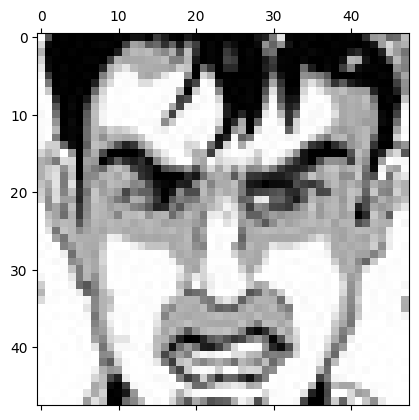

In [65]:
img = cv2.imread('C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\validation\\angry\\38.jpg')
plt.matshow(img)

In [62]:
predict_emotion(model, 'C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\validation\\angry\\38.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'angry'

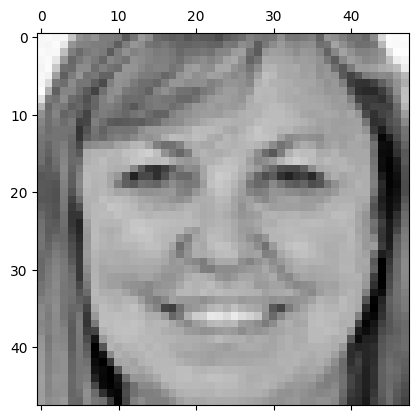

In [66]:
img = cv2.imread('C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\validation\\happy\\167.jpg')
plt.matshow(img)

In [63]:
predict_emotion(model, 'C:\\Users\\gotze\\OneDrive\\Desktop\\ESD Mf\\images\\validation\\happy\\167.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


'happy'